# SLR - Simple Linear Regeression

In [1]:
#Recap
#Machine learning models are built in order to make predictions.
#We gather data, analyse it but how to make predictions?

#To make predictions we have to build a model, 
   #it should be able understand data, identifies some pattern,
    #and once u build the model
     #based on historical patterns it predicts for new data that comes up in future.

In [2]:
#Earlier we learnt about 2 types of modelling:
 #1. Supervised : There is a dependent var
 #2. Unsupervised : There is no dependent var.

#Under supervised we had 2 models:
 #1. Regression : When to try to predict some numerical values that is in a continuous range.
 #2. Classification: When we try to predict some categories/classes etc.

In [3]:
#We are now starting with SLR

#Simple : means there is only 1 input and only 1 output,
        #based on 1 input u predict 1 output.
    
#In linear regression, we find the best fit line which covers most data points.
#The best fit line has the least error.
#y predicted, OLS, R SQUARE, r (4 topics discussed)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


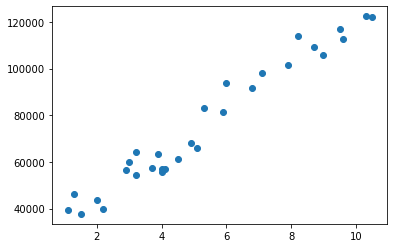

In [7]:
plt.scatter(df.YearsExperience,df.Salary)

In [8]:
#There is some linear and positive relationship. so we can proceed.

In [9]:
df.corr()       #to see how related x and y are
                #strong correlation as it is close to 1.

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


OLS - ORDINARY LEAST SQUARE

In [10]:
#We need to use ols method now
#import required lib and then use the function from lib

import statsmodels.formula.api as smf

In [11]:
#the way u pass data here:
                          #y~x = y=b0+b1x     (#y dependent on x)
                          #train the model to get best fit line
                          #fit() - trains the data

model=smf.ols("Salary~YearsExperience",data=df).fit()      

In [12]:
#to check our intercept and constant use (params)  or parameters

model.params           #b0 = intercept = 25792
                       #b1 = slope     =  9449

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
#We have fitted and trained the line
#Now we have to predict, so use predict method


pred=model.predict(df.iloc[:,0])       #for prediction we give input (YearsExperience)
                                  #Based on it we y pred

In [14]:
df.head()   #original y u can see

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
pred         #predicted y you can see here

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

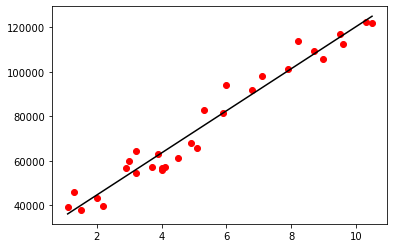

In [16]:
#Let us now see the data using scatter plot
#actual y      (red dots)
#predicted y   (regression line in black)

plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red')   
plt.plot(df['YearsExperience'],pred,color='black')  

In [17]:
#So far we have seen reg using statsmodel lib


#Now let us see it using sklearn lib


In [18]:
#first we must seperate our x and y

features=df.iloc[:,[0]].values                 #.values = converts to array
labels=df.iloc[:,[1]].values                   #array is required format

In [19]:
features.shape         #2d array

(30, 1)

In [20]:
labels.shape          #2d array

(30, 1)

In [21]:
#import from sklearn the needed function

from sklearn.linear_model import LinearRegression

In [22]:
model1=LinearRegression()               #calling object
model1.fit(features,labels)

LinearRegression()

In [23]:
#to see b0 and b1 in sklearn 
#use .intercept_
#    .coef_

In [24]:
model1.intercept_    #b0

array([25792.20019867])

In [25]:
model1.coef_      #b1

array([[9449.96232146]])

In [26]:
pred1=model1.predict(features)

In [27]:
pred1

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [28]:
#Rsquare  : use score
#when Rsquare is closest to 1 it means there is very strong rtln b/w x and y
#as we can the 0.95% of y is based on x
model1.score(features,labels)

0.9569566641435086

In [29]:
#So far we have trained our entire data, but in real life we shd not do so.
#If we train entire data, our ML algorithm will learn it up and may predict wrong for
                                 #unkown data
    
#Therefore we must split our data:
 #1. Training data : for training model
 #2. Testing data  : to see qlty of model

In [30]:
#To split our data we use sklearn model_selection for train test split

from sklearn.model_selection import train_test_split

In [31]:
#test size (80-20, 70-30, 60-40 etc..) 

# it means train is 80, test is 20

# so we only train or fit our model for 80% of data.
# and then we make predictions.

#random state means calling fixed/same random observations everytime we repeat exp.

#we get 4 things here after the splitting happens
#1. x_train   2. x_test.   3. y_train     4. y_test

x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=23) 

In [32]:
x_train

array([[ 8.7],
       [ 1.3],
       [ 2. ],
       [ 9.5],
       [ 5.3],
       [ 5.9],
       [ 1.1],
       [ 4.5],
       [ 2.9],
       [ 4. ],
       [ 1.5],
       [ 9. ],
       [ 8.2],
       [10.3],
       [10.5],
       [ 3.2],
       [ 4. ],
       [ 4.1],
       [ 9.6],
       [ 7.9],
       [ 3.7],
       [ 3.2],
       [ 3. ],
       [ 6. ]])

In [33]:
x_test

array([[5.1],
       [6.8],
       [3.9],
       [4.9],
       [7.1],
       [2.2]])

In [34]:
#Train the model

model2=LinearRegression()
model2.fit(x_train,y_train)      #get x and y of training data

LinearRegression()

In [35]:
#checking Rsquare on training data

model2.score(x_train,y_train)

0.9603182547438908

In [36]:
#checking Rsquare on testing data

model2.score(x_test,y_test)

0.9184170849214232

In [37]:
#making predictions

pred3=model2.predict(x_test)     #prediction on testing data, so i gave testing i/p

In [38]:
pred3                            #predicted y for testing data

array([[74501.41002938],
       [90279.63442954],
       [63363.83986457],
       [72645.14833525],
       [93064.02697075],
       [47585.61546441]])

In [39]:
y_test                         #actual y of testing data

array([[66029.],
       [91738.],
       [63218.],
       [67938.],
       [98273.],
       [39891.]])

In [40]:
#Checking rquare for predicted data


model2.score(x_test,pred3)      #its perfect and all datapts r within the line

1.0

In [41]:
####



#Mean squared error = taking mean of the squared error
#Root Mean Squared Error = root of mean sqaured error (unitless)  


#we can import from sklearn metrics

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#MSE, r2
#(b/w actual y and predicted y for training data)
#you can do the same for testing data

mse=mean_squared_error(y_train,model2.predict(x_train))  
r2=r2_score(y_train,model2.predict(x_train))

In [44]:
print('MSE',mse)
print('r2',r2)

MSE 32050452.832389366
r2 0.9603182547438908


In [45]:
np.sqrt(mse)         #on an avg there is an error of +5661 or -5661

5661.311935619638